# **Optimization Final Project (2025)**

### **Subject: Optimization Methods for Recommender Systems (Matrix Completion Problem)**


GROUP 17
Group Members:

*   2081787    Kateryna Skurativska
*   2072251    Sharare Zolghadr

### **Frank Wolfe Algorithm**



The classical Frank-Wolfe (FW) method for minimization of a smooth objective function $ f $ generates a sequence of feasible points $ \{x_k\} $ following the scheme of Algorithm 1.

At iteration $ k $, the algorithm moves toward a **vertex** (i.e., an **extreme point**) of the feasible set by minimizing the scalar product with the current gradient $ \nabla f(x_k) $.

It therefore makes use of a **Linear Minimization Oracle (LMO)** for the feasible set $ C $, defined as:

$
\text{LMO}_C(g) \in \arg\min_{z \in C} \langle g, z \rangle \tag{1}
$






\begin{aligned}
&\textbf{Problem:} \quad \min_{x \in C} f(x) \\
&\textbf{where:} \\
&\quad f : \mathbb{R}^n \rightarrow \mathbb{R} \text{ is convex with Lipschitz continuous gradient (constant } L > 0\text{)} \\
&\quad C \subseteq \mathbb{R}^n \text{ is a convex, compact (i.e., closed and bounded) set}
\end{aligned}




\begin{array}{ll}
\textbf{Algorithm 1} \text{ Frank-Wolfe method} \\
\hline
1. \text{Choose a point } x_0 \in C \\
2. \text{For } k = 0, 1, 2, \dots \\
3. \quad \text{If } x_k \text{ satisfies some stopping condition, then STOP} \\
4. \quad \text{Compute } s_k \in \text{LMO}_C(\nabla f(x_k)) \\
5. \quad \text{Set } d_k^{FW} = s_k - x_k \\
6. \quad \text{Set } x_{k+1} = x_k + \alpha_k d_k^{FW}, \quad \alpha_k \in (0, 1] \\
7. \text{End For}
\end{array}




### **Pairwise Frank-Wolfe Algorithm (PFW)**

The Pairwise Frank-Wolfe (PFW) algorithm is a variant of the classical Frank-Wolfe method aimed at accelerating convergence, especially when the solution lies on the boundary of the feasible set. Unlike the standard FW algorithm, which shrinks all active weights in each iteration, PFW performs a focused update by transferring weight mass \emph{only between two atoms}.

At each iteration, PFW identifies:

* the **FW atom** $ s_t $, obtained via a linear minimization oracle,
* the **away atom** $ v_t $, which maximizes the inner product with the gradient among active atoms.


The pairwise update direction is:
$
d_t = s_t - v_t
$

With the maximum step size:
$
\gamma_{\text{max}} = \alpha_{v_t}
$

The weights are updated as:
$
\alpha_{v_t}^{(t+1)} = \alpha_{v_t}^{(t)} - \gamma, \quad
\alpha_{s_t}^{(t+1)} = \alpha_{s_t}^{(t)} + \gamma, \quad \text{for } \gamma \leq \gamma_{\text{max}}
$

This selective movement between atoms allows PFW to achieve \textbf{global linear convergence} under milder assumptions than strong convexity. It is particularly effective in structured problems such as those involving the flow polytope, marginal polytope, or base polytope in submodular optimization.

$$
\begin{array}{ll}
\textbf{Algorithm 2} \ \text{Pairwise Frank-Wolfe algorithm: } \textbf{PFW}(x^{(0)}, \mathcal{A}, \epsilon) \\
\hline
1: \ \text{Let } x^{(0)} \in \mathcal{A}, \text{ and } \mathcal{S}^{(0)} := \{x^{(0)}\} \quad (\text{so that } \alpha_v^{(0)} = 1 \text{ for } v = x^{(0)} \text{ and } 0 \text{ otherwise}) \\
2: \ \textbf{for } t = 0, 1, \dots, T \ \textbf{do} \\
3: \quad \text{Let } s_t := \mathrm{LMO}_{\mathcal{A}}(\nabla f(x^{(t)})) \quad \text{and } d_t^{FW} := s_t - x^{(t)} \quad \text{(the FW direction)} \\
4: \quad \text{Let } v_t \in \arg\max_{v \in \mathcal{S}^{(t)}} \langle \nabla f(x^{(t)}), v \rangle \quad \text{and } d_t^{A} := x^{(t)} - v_t \quad \text{(the away direction)} \\
5: \quad \textbf{if } g_t^{FW} := \langle -\nabla f(x^{(t)}), d_t^{FW} \rangle \leq \epsilon \ \textbf{then return } x^{(t)} \quad \text{(FW gap is small enough, so return)} \\
6: \quad d_t := s_t - v_t \\
7: \quad \gamma_{\max} := \alpha_{v_t} \\
8: \quad \text{Line-search: } \gamma_t \in \arg\min_{\gamma \in [0, \gamma_{\max}]} f(x^{(t)} + \gamma d_t) \\
9:\quad \text{Update } x^{(t+1)} := x^{(t)} + \gamma_t d_t \\
10:\quad \text{Update } \mathcal{S}^{(t+1)} := \{ v \in \mathcal{A} \mid \alpha_v^{(t+1)} > 0 \} \\
11:\textbf{end for}
\end{array}
$$


### **Matrix Completion Problem**


FW methods and variants are a natural choice for constrained optimization on convex sets admitting a linear minimization oracle significantly faster than computing a projection. We present here in particular matrix completion problem.


Matrix completion is a widely studied problem that comes up in many areas of science and engineering, including collaborative filtering, machine learning, control, remote sensing, and computer vision.

The goal is to retrieve a **low-rank matrix** $ X \in \mathbb{R}^{n_1 \times n_2} $ from a sparse set of observed matrix entries $ \{ U_{ij} \}_{(i, j) \in \mathcal{J}} $, where $ \mathcal{J} \subseteq [1:n_1] \times [1:n_2] $.

Thus, the matrix completion problem can be formulated as follows:



$$
\min_{X \in \mathbb{R}^{n_1 \times n_2}} f(X) := \sum_{(i,j)\in \mathcal{J}} (X_{ij} - U_{ij})^2 \quad \text{subject to} \quad \text{rank}(X) \leq \delta
$$



Here, the function $ f $ is given by the squared loss over the observed entries, and $ \delta > 0 $ is a parameter representing our prior belief about the rank of the reconstructed matrix.

In practice, the rank constraint is relaxed using a **nuclear norm ball** constraint. Recall that the **nuclear norm** $ \|X\|_* $ is the sum of the singular values of $ X $.

This leads to the convex optimization problem:



$$
\min_{X \in \mathbb{R}^{n_1 \times n_2}} \sum_{(i,j)\in \mathcal{J}} (X_{ij} - U_{ij})^2 \quad \text{subject to} \quad \|X\|_* \leq \delta
$$

The feasible set is the convex hull of rank-one matrices:

$$
\mathcal{C} = \{ X \in \mathbb{R}^{n_1 \times n_2} : \|X\|_* \leq \delta \} = \text{conv}\left\{ \delta u v^\top : \|u\| = \|v\| = 1 \right\}
$$

Let $ A_{\mathcal{J}} $ be the matrix that coincides with $ A $ on the observed indices $ \mathcal{J} $, and is zero elsewhere. Then the gradient of the objective is:

$$
\nabla f(X) = 2 (X - U)_{\mathcal{J}}
$$

At each iteration $ k $, the Frank-Wolfe algorithm uses the **Linear Minimization Oracle (LMO)** to solve:

$$
\text{LMO}_{\mathcal{C}}(\nabla f(X_k)) \in \arg\min_{\|X\|_* \leq \delta} \text{tr}(\nabla f(X_k)^\top X)
$$



This LMO solution corresponds to a rank-one matrix $ \delta u_1 v_1^\top $, where $ u_1 $ and $ v_1 $ are the top left and right singular vectors of $ -\nabla f(X_k) $.

Hence, the Frank-Wolfe method incrementally reconstructs the matrix as a sparse combination of rank-one matrices.

Moreover, due to the sparsity of the gradient $ \nabla f(X) $ (only $ |\mathcal{J}| $ non-zero entries), both storage and approximate singular vector computations can be performed more efficiently than for dense matrices.



In [2]:
!pip install tueplots

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
from numpy.linalg import svd
import matplotlib.pyplot as plt
from numpy import linalg
import os
import pandas as pd
from numpy.linalg import svd
from numpy.linalg import norm
from urllib.request import urlretrieve
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **Helper functions**

In [4]:
import matplotlib.pyplot as plt
from tueplots import bundles, constants
import numpy as np


import matplotlib.pyplot as plt
from tueplots import bundles, constants
import numpy as np

from tueplots import bundles
# Dynamically get the style function from bundles
# List of tueplots style function names
style_names = [fn for fn in dir(bundles) if not fn.startswith("_") and callable(getattr(bundles, fn))]

style_func = getattr(bundles, "icml2024")
style = style_func()

# Disable LaTeX to prevent errors in Colab
style.update({"text.usetex": False})
plt.rcParams.update(style)
# Override fonts and size
plt.rcParams.update({
        "font.family": "sans-serif",
        "font.sans-serif": ["DejaVu Sans"],
        "font.size": 12,
        "axes.titlesize": 12,
        "axes.labelsize": 10,
        "xtick.labelsize": 9,
        "ytick.labelsize": 9,
        "legend.fontsize": 9,
})
# Use custom tue_plot color palette (convert RGB arrays to hex)
tue_rgb = constants.color.palettes.tue_plot
colors = ['#%02x%02x%02x' % tuple((np.array(rgb) * 255).astype(int)) for rgb in tue_rgb]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [6]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix


# Computes Root Mean Squared Error (RMSE) over observed entries (as defined by mask)
def evaluate_rmse(X, mask, M_true):
    error = ((X - M_true) * mask) ** 2            # Squared error only on observed entries
    return np.sqrt(np.sum(error) / np.sum(mask)) # Average over observed entries and take square root


# Computes relative accuracy (%) over masked entries: how many predictions are within tolerance
def relative_accuracy(y_pred, y_true, mask, tolerance=0.50):
    diff = np.abs((np.array(y_pred) - np.array(y_true)) * mask)   # Absolute error only where mask = 1
    return np.mean(diff <= tolerance) * 100                        # Percentage of accurate predictions (within tolerance)



# Linear Minimization Oracle (LMO) — returns best rank-1 matrix (scaled by tau) in the direction of -grad
def LMO_top_singular(grad, tau=1):
    u, s, vt = svd(-grad, full_matrices=False)  # Compute SVD of negative gradient
    u = u[:, 0]                                  # Take the top left singular vector
    v = vt[0, :]                                 # Take the top right singular vector
    u = u / np.linalg.norm(u)                    # Normalize u to unit norm
    v = v / np.linalg.norm(v)                    # Normalize v to unit norm
    S = tau * np.outer(u, v)                     # Construct rank-1 matrix scaled by tau
    return S, u, v                                # Return rank-1 matrix and its components


# Estimates the nuclear norm tau from the observed matrix M_obs.
# Returns: total tau, partial tau (for energy threshold), and number of top singular values (delta).
def estimate_tau(M_obs, energy_threshold=0.9, use_sparse=True):
    if use_sparse and isinstance(M_obs, csr_matrix):
        # Use sparse SVD for large/sparse matrices
        k = min(M_obs.shape) - 1                        # Number of singular values to compute
        u, s, vt = svds(M_obs, k=k)                     # Compute top-k singular values
        s = np.sort(s)[::-1]                            # Sort in descending order
    else:
        # Use full SVD for small/dense matrices
        u, s, vt = np.linalg.svd(M_obs, full_matrices=False)

    # Total nuclear norm (sum of all singular values)
    tau_estimate_total = np.sum(s)

    # Compute cumulative energy and find number of singular values to reach threshold
    cumulative_energy = np.cumsum(s) / np.sum(s)
    delta = np.searchsorted(cumulative_energy, energy_threshold) + 1  # Index of cutoff
    tau_estimate_partial = np.sum(s[:delta])                          # Partial tau for top-delta values

    return tau_estimate_total, tau_estimate_partial, delta


# Backtracking line search using the Armijo rule to find a suitable step size gamma
def line_search_armijo_rule(G: np.ndarray, D: np.ndarray, mask: np.ndarray,
                            gamma_max: float = 1.0, delta: float = 0.8, gamma_param: float = 0.5) -> float:
    gamma = gamma_max  # Start with the maximum allowed step size

    # Compute current objective value at G (projected on observed entries)
    f_x = np.sum((G * mask) ** 2) / 2

    # Compute directional derivative: gradient dot direction
    grad_dot_d = np.sum(G * D)

    # Trial point: take a full step in direction D
    X_new = gamma * D

    # Compute new objective value after step
    f_new = np.sum(((X_new + G) * mask) ** 2) / 2

    # Backtrack while Armijo condition is not satisfied
    while f_new > f_x + gamma_param * gamma * grad_dot_d:
        gamma *= delta                              # Reduce step size
        X_new = gamma * D                           # Recompute trial point
        f_new = np.sum(((X_new + G) * mask) ** 2) / 2  # Recompute objective

    return gamma  # Return the final step size that satisfies the condition



# Computes the exact step size (gamma) that minimizes the squared error objective along direction D
def _exact_line_search(G: np.ndarray, D: np.ndarray, mask: np.ndarray, gamma_max: float = 1.0) -> float:
    d_proj = D * mask                          # Project the direction D onto observed entries (Omega)
    denom = np.sum(d_proj ** 2)                # Denominator: squared norm of the projected direction

    if denom == 0:
        return 0.0                             # If direction has no effect on observed entries, take no step

    num = -np.sum(G * D)                       # Numerator: negative directional derivative

    gamma_star = num / denom                   # Optimal step size minimizing the objective along D
    gamma = max(0.0, min(gamma_max, gamma_star))  # Clamp gamma to [0, gamma_max] range

    return gamma                               # Return the final step size


# **Frank-Wolfe(PairWise) with different step size strategy**

In [14]:
def mc_fw(M, Omega, tau=10, Tmax=100, TOL=1e-14, verbose=True, step_size="default"):
    # Get matrix dimensions
    m, n = M.shape

    # Initialize the solution matrix X with zeros
    X = np.zeros((m, n))

    # Lists to store atoms (rank-1 matrices) and their coefficients
    atoms = []
    coeffs = []

    # History tracking for convergence
    gaps = []  # Duality gap at each iteration
    objs = []  # Objective function value at each iteration

    # Main optimization loop
    for t in range(1, Tmax + 1):
        # Compute gradient over observed entries only: grad = (X - M) projected on Omega
        grad = (X - M) * Omega

        # Linear Minimization Oracle (LMO): get top singular vectors and construct rank-1 matrix S = tau * u v^T
        S, u, v = LMO_top_singular(grad, tau)

        # Compute Frank-Wolfe direction: move from current estimate X to S
        d_FW = S - X

        # Compute duality gap (used as stopping criterion and line search guidance)
        gap = -np.sum(grad * d_FW)
        gaps.append(gap)

        # Compute objective value (squared Frobenius norm on observed entries)
        objs.append(np.sum(((X - M) * Omega) ** 2))

        # Print progress every 10 iterations
        if verbose and t % 10 == 0:
            print(f"Iter {t:3d}, Obj = {objs[-1]:.5f}, Gap = {gap:.5e}, Atoms = {len(atoms)}")

        # Stop if the duality gap is below the desired tolerance (solution is close to optimal)
        if gap < TOL:
            break

        # --- Step size selection ---
        if step_size == "default":
            # Standard diminishing step size
            eta = 2 / (t + 2)
        elif step_size == "exact":
            # Optimal step size by exact line search
            eta = _exact_line_search(grad, d_FW, Omega)
        elif step_size == "armijo":
            # Armijo backtracking line search
            eta = line_search_armijo_rule(grad, d_FW, Omega)
        elif step_size == "lipschitz":
            # Lipschitz-based step size (assuming L=1)
            L = 1
            norm_d = np.linalg.norm(d_FW * Omega)
            eta = min(1, gap / (L * norm_d**2)) if norm_d > 1e-12 else 0
        else:
            # Unknown step size method
            raise ValueError(f"Unknown step_size method: {step_size}")

        # Update solution using chosen step size
        X += eta * d_FW

        # Add new atom and its coefficient to the model
        atoms.append((u, v))
        coeffs.append(eta * tau)

    # After optimization, print summary if requested
    if verbose:
        print(f"\nFinal number of atoms: {len(atoms)}")
        print(f"Final rank of X: {np.linalg.matrix_rank(X)}")

    # Return the completed matrix, and the optimization history
    return X, objs, gaps

In [15]:
def mc_pfw(M, Omega, tau=1, Tmax=100, verbose=True, TOL=1e-8, step_size="default"):
    # Get matrix dimensions
    m, n = M.shape

    # Initialize the solution matrix X with zeros
    X = np.zeros((m, n))

    # Lists to store atoms (rank-1 matrices as (u, v) pairs) and their coefficients
    atoms = []
    coeffs = []

    # Lists to track optimization history
    gaps = []  # Duality gap at each iteration
    objs = []  # Objective function value at each iteration

    # Main optimization loop
    for t in range(1, Tmax + 1):
        # Compute gradient: only over observed entries (inlined projection)
        grad = (X - M) * Omega

        # Linear Minimization Oracle: best rank-1 direction scaled by tau
        S, u, v = LMO_top_singular(grad, tau)

        # Frank-Wolfe direction (move from current X toward S)
        d_FW = S - X

        # Duality gap (how suboptimal current X is)
        gap = -np.sum(grad * d_FW)
        gaps.append(gap)

        # Compute and store current objective value (over Omega)
        objs.append(np.sum(((X - M) * Omega) ** 2))

        # Optionally print progress every 10 iterations
        if verbose and t % 10 == 0:
            print(f"Iter {t:3d}, Obj={objs[-1]:.5f}, Gap={gap:.2e}, Atoms={len(atoms)}")

        # Stopping criterion: if gap is small enough, terminate
        if gap < TOL:
            break

        # === First iteration: no atoms yet ===
        if not atoms:
            # Select step size using chosen method
            if step_size == "default":
                eta = 2 / (t + 2)
            elif step_size == "exact":
                eta = _exact_line_search(grad, d_FW, Omega)
            elif step_size == "armijo":
                eta = line_search_armijo_rule(grad, d_FW, Omega)
            elif step_size == "lipschitz":
                L = 1
                norm_d = np.linalg.norm(d_FW * Omega)
                eta = min(1, gap / (L * norm_d**2)) if norm_d > 1e-12 else 0
            else:
                raise ValueError(f"Unknown step_size method: {step_size}")

            # Update X using step size and FW direction
            X += eta * d_FW

            # Store atom and its coefficient
            atoms.append((u, v))
            coeffs.append(eta * tau)
            continue

        # === Pairwise Frank-Wolfe step ===

        # Find atom to move away from (worst score w.r.t. current gradient)
        worst_score = -np.inf
        id_away = None
        for idx, ((ui, vi), alpha) in enumerate(zip(atoms, coeffs)):
            A_i = np.outer(ui, vi)
            score = alpha * np.sum(grad * A_i)
            if score > worst_score:
                worst_score = score
                id_away = idx

        # Build the "away atom" and compute maximum coefficient to reduce
        A_away = np.outer(atoms[id_away][0], atoms[id_away][1])
        alpha_max = coeffs[id_away]

        # Compute pairwise direction (from away atom to S)
        d = S - A_away

        # Perform scalar line search along this direction
        def obj_line_search(gamma):
            return np.sum(((X + gamma * d - M) * Omega) ** 2)

        res = minimize_scalar(obj_line_search, bounds=(0, alpha_max), method='bounded')
        gamma = res.x if res.success else 0

        # If step is too small, fallback to regular FW update
        if gamma <= 1e-6:
            if step_size == "default":
                eta = 2 / (t + 2)
            elif step_size == "exact":
                eta = _exact_line_search(grad, d_FW, Omega)
            elif step_size == "armijo":
                eta = line_search_armijo_rule(grad, d_FW, Omega)
            elif step_size == "lipschitz":
                L = 1
                norm_d = np.linalg.norm(d_FW * Omega)
                eta = min(1, gap / (L * norm_d**2)) if norm_d > 1e-12 else 0
            else:
                raise ValueError(f"Unknown step_size method: {step_size}")

            # Regular FW update and shrink all existing weights
            X += eta * d_FW
            coeffs = [c * (1 - eta) for c in coeffs]
            atoms.append((u, v))
            coeffs.append(eta * tau)
            continue

        # === Apply pairwise update ===

        # Update X
        X += gamma * d

        # Reduce weight of the "away atom"
        coeffs[id_away] -= gamma

        # If its weight drops to zero, remove the atom
        if coeffs[id_away] <= 1e-8:
            coeffs.pop(id_away)
            atoms.pop(id_away)

        # Try merging with existing atom if it's very similar to S
        merged = False
        for j, (uj, vj) in enumerate(atoms):
            if np.allclose(np.outer(uj, vj), S, atol=1e-8):
                coeffs[j] += gamma
                merged = True
                break

        # If not merged, add new atom to the list
        if not merged:
            atoms.append((u, v))
            coeffs.append(gamma)

    # Print final model summary
    if verbose:
        print(f"\nFinal atoms: {len(atoms)}")
        print(f"Final rank of X: {np.linalg.matrix_rank(X)}")

    # Return completed matrix and optimization history
    return X, objs, gaps


# **Artificial Dataset**

In [10]:
# ==========================================================
# Matrix Completion Benchmark — Frank-Wolfe Variants
# ==========================================================

# --- Setup ---
np.random.seed(42)
m, n, r = 50, 50, 5

# Generate low-rank ground truth matrix M_true = U Vᵗ
U = np.random.randn(m, r)
V = np.random.randn(n, r)
M_true = U @ V.T

# Create observation mask (30% entries observed)
Omega = np.random.rand(m, n) < 0.3

# Construct observed matrix with missing entries
M_obs = np.zeros_like(M_true)
M_obs[Omega] = M_true[Omega]

# Estimate tau using nuclear norm of observed matrix
U_svd, s, Vt_svd = svd(M_obs, full_matrices=False)
estimated_tau = np.sum(s)


# ==========================================================
# Run Frank-Wolfe Variants (different step sizes)
# ==========================================================

X_fw1, objs_fw1, gaps_fw1 = mc_fw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="default")
X_fw2, objs_fw2, gaps_fw2 = mc_fw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="exact")
X_fw3, objs_fw3, gaps_fw3 = mc_fw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="armijo")
X_fw4, objs_fw4, gaps_fw4 = mc_fw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="lipschitz")


# ==========================================================
# Run Pairwise Frank-Wolfe Variants (different step sizes)
# ==========================================================

X_pfw1, objs_pfw1, gaps_pfw1 = mc_pfw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="default")
X_pfw2, objs_pfw2, gaps_pfw2 = mc_pfw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="exact")
X_pfw3, objs_pfw3, gaps_pfw3 = mc_pfw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="armijo")
X_pfw4, objs_pfw4, gaps_pfw4 = mc_pfw(M_obs, Omega, tau=estimated_tau, Tmax=100, TOL=1e-14, step_size="lipschitz")




Iter  10, Obj = 3104.05250, Gap = 7.40575e+03, Atoms = 9
Iter  20, Obj = 1257.30918, Gap = 5.71973e+03, Atoms = 19
Iter  30, Obj = 416.65341, Gap = 2.55133e+03, Atoms = 29
Iter  40, Obj = 251.70737, Gap = 1.70632e+03, Atoms = 39
Iter  50, Obj = 161.81896, Gap = 1.02384e+03, Atoms = 49
Iter  60, Obj = 174.73638, Gap = 9.72764e+02, Atoms = 59
Iter  70, Obj = 120.94641, Gap = 1.00615e+03, Atoms = 69
Iter  80, Obj = 97.73014, Gap = 7.40648e+02, Atoms = 79
Iter  90, Obj = 54.33461, Gap = 5.71296e+02, Atoms = 89
Iter 100, Obj = 69.46324, Gap = 5.58306e+02, Atoms = 99

Final number of atoms: 100
Final rank of X: 50
Iter  10, Obj = 385.12590, Gap = 1.66279e+03, Atoms = 9
Iter  20, Obj = 116.33279, Gap = 6.63732e+02, Atoms = 19
Iter  30, Obj = 51.22769, Gap = 3.48011e+02, Atoms = 29
Iter  40, Obj = 27.68955, Gap = 2.36887e+02, Atoms = 39
Iter  50, Obj = 15.92454, Gap = 1.68206e+02, Atoms = 49
Iter  60, Obj = 10.21747, Gap = 1.36708e+02, Atoms = 59
Iter  70, Obj = 6.87821, Gap = 9.64398e+01, Ato

/var/folders/6b/bj1ncwb9433ghncl62bz8sm00000gn/T/ipykernel_74991/508314572.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


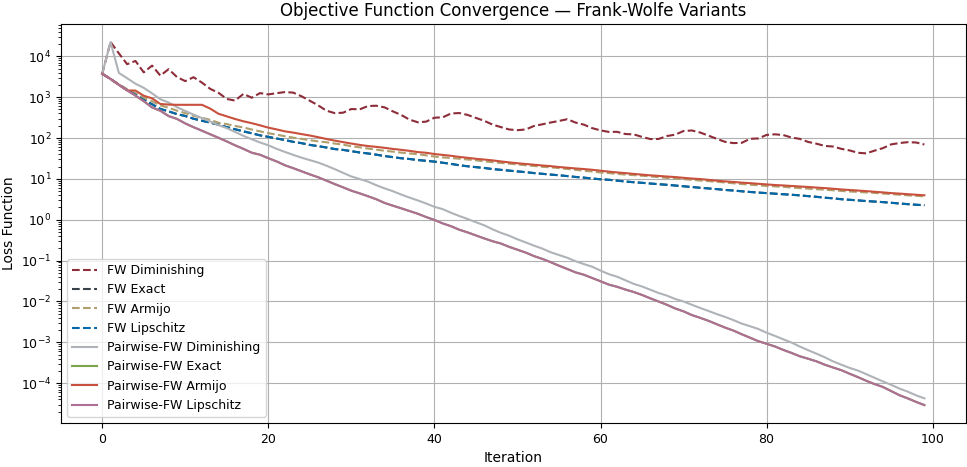

/var/folders/6b/bj1ncwb9433ghncl62bz8sm00000gn/T/ipykernel_74991/508314572.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


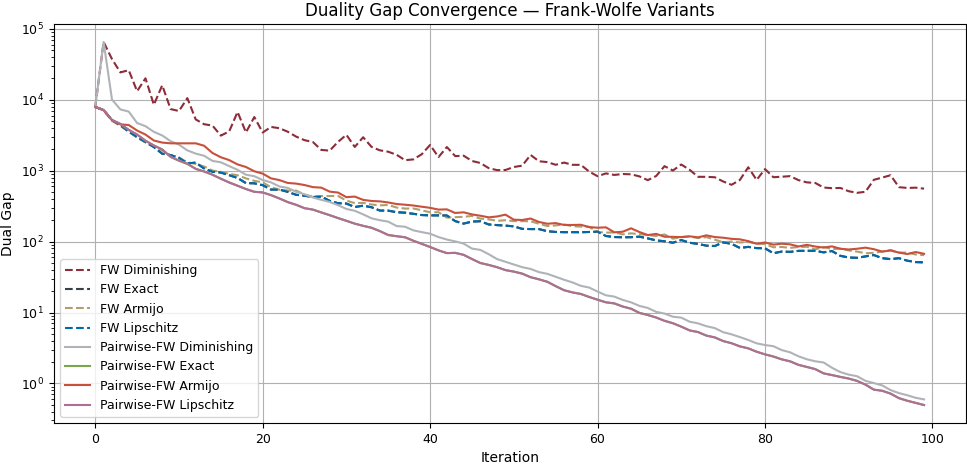

In [11]:
# ==========================================================
# Plot Objective Function Convergence
# ==========================================================

plt.figure(figsize=(10, 5))

# Frank-Wolfe (dashed lines)
plt.semilogy(objs_fw1, '--', label='FW Diminishing')
plt.semilogy(objs_fw2, '--', label='FW Exact')
plt.semilogy(objs_fw3, '--', label='FW Armijo')
plt.semilogy(objs_fw4, '--', label='FW Lipschitz')

# Pairwise Frank-Wolfe (solid lines)
plt.semilogy(objs_pfw1, label='Pairwise-FW Diminishing')
plt.semilogy(objs_pfw2, label='Pairwise-FW Exact')
plt.semilogy(objs_pfw3, label='Pairwise-FW Armijo')
plt.semilogy(objs_pfw4, label='Pairwise-FW Lipschitz')

plt.title("Objective Function Convergence — Frank-Wolfe Variants")
plt.xlabel("Iteration")
plt.ylabel("Loss Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ==========================================================
# Plot Duality Gap Convergence
# ==========================================================

plt.figure(figsize=(10, 5))

# Frank-Wolfe (dashed lines)
plt.semilogy(gaps_fw1, '--', label='FW Diminishing')
plt.semilogy(gaps_fw2, '--', label='FW Exact')
plt.semilogy(gaps_fw3, '--', label='FW Armijo')
plt.semilogy(gaps_fw4, '--', label='FW Lipschitz')

# Pairwise Frank-Wolfe (solid lines)
plt.semilogy(gaps_pfw1, label='Pairwise-FW Diminishing')
plt.semilogy(gaps_pfw2, label='Pairwise-FW Exact')
plt.semilogy(gaps_pfw3, label='Pairwise-FW Armijo')
plt.semilogy(gaps_pfw4, label='Pairwise-FW Lipschitz')

plt.title("Duality Gap Convergence — Frank-Wolfe Variants")
plt.xlabel("Iteration")
plt.ylabel("Dual Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **MovieLens DataSet**

In [12]:
# ==========================================================
# Step 1: Download and Preprocess the MovieLens Dataset
# ==========================================================

url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_path = "ml-100k.zip"
data_dir = "ml-100k"

# Download and extract dataset if not already available
if not os.path.exists(data_dir):
    urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()
    os.remove(zip_path)

# Load ratings into DataFrame
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(os.path.join(data_dir, 'u.data'), sep='\t', names=columns)

# ==========================================================
# Step 2: Filter for Active Users (rated more than 50 items)
# ==========================================================

user_counts = df['user_id'].value_counts()
active_users = user_counts[user_counts > 50].index

# Use .copy() to avoid SettingWithCopyWarning
df_active = df[df['user_id'].isin(active_users)].copy()

# ==========================================================
# Step 3: Re-map User and Item IDs to Continuous Indices
# ==========================================================

user_mapping = {uid: idx for idx, uid in enumerate(df_active['user_id'].unique())}
item_mapping = {iid: idx for idx, iid in enumerate(df_active['item_id'].unique())}

df_active['user_idx'] = df_active['user_id'].map(user_mapping)
df_active['item_idx'] = df_active['item_id'].map(item_mapping)

n_users = len(user_mapping)
n_items = len(item_mapping)

# ==========================================================
# Step 4: Train-Validation Split
# ==========================================================

train_data, val_data = train_test_split(df_active, test_size=0.2, random_state=42)

# ==========================================================
# Step 5: Create Masks and Observed Matrix
# ==========================================================

train_mask = np.zeros((n_users, n_items), dtype=bool)
train_mask[train_data['user_idx'], train_data['item_idx']] = True

val_mask = np.zeros((n_users, n_items), dtype=bool)
val_mask[val_data['user_idx'], val_data['item_idx']] = True

M_obs = np.zeros((n_users, n_items))
M_obs[train_data['user_idx'], train_data['item_idx']] = train_data['rating']

# ==========================================================
# Step 6: Estimate Tau from the Observed Matrix
# ==========================================================

U, s, Vt = svd(M_obs, full_matrices=False)
estimated_tau = np.sum(s) * 0.1   # Use 10% of nuclear norm as constraint
tol = 1e-14

print(f"Shape of M_obs: {M_obs.shape}")

# Compute numerical rank of M_obs
U, s, Vt = np.linalg.svd(M_obs)
tol = 1e-10
rank = np.sum(s > tol)
print(f"Rank of the observed rating matrix M_obs: {rank}")


Shape of M_obs: (563, 1681)
Rank of the observed rating matrix M_obs: 563


## **FW algorithm for MovieLense**

In [16]:

# ==========================================================
# Step 7: Run Frank-Wolfe Matrix Completion Variants
# ==========================================================

X_fw_fixedM, objs_fw_fixedM, gaps_fixedM = mc_fw(
    M_obs, train_mask, Tmax=100, tau=estimated_tau,  step_size="default"
)

X_fw_exactM, objs_fw_exactM, gaps_exactM = mc_fw(
    M_obs, train_mask, Tmax=100, tau=estimated_tau, step_size="exact"
)

X_fw_armijoM, objs_fw_armijoM, gaps_armijoM = mc_fw(
    M_obs, train_mask, Tmax=100, tau=estimated_tau, step_size="armijo"
)

X_fw_lipschitzM, objs_fw_lipschitzM, gaps_lipschitzM = mc_fw(
    M_obs, train_mask, Tmax=100, tau=estimated_tau, step_size="lipschitz"
)


Iter  10, Obj = 199961.70486, Gap = 6.68326e+04, Atoms = 9
Iter  20, Obj = 150672.36378, Gap = 9.56102e+03, Atoms = 19
Iter  30, Obj = 140881.27487, Gap = 3.99766e+03, Atoms = 29
Iter  40, Obj = 137468.24181, Gap = 2.20603e+03, Atoms = 39
Iter  50, Obj = 135903.48248, Gap = 1.40125e+03, Atoms = 49
Iter  60, Obj = 135056.42681, Gap = 9.69663e+02, Atoms = 59
Iter  70, Obj = 134546.30837, Gap = 7.11141e+02, Atoms = 69
Iter  80, Obj = 134215.32565, Gap = 5.43967e+02, Atoms = 79
Iter  90, Obj = 133988.38386, Gap = 4.29599e+02, Atoms = 89
Iter 100, Obj = 133826.00898, Gap = 3.47899e+02, Atoms = 99

Final number of atoms: 100
Final rank of X: 29
Iter  10, Obj = 144586.19645, Gap = 1.00090e+04, Atoms = 9
Iter  20, Obj = 137062.34395, Gap = 2.39546e+03, Atoms = 19
Iter  30, Obj = 133250.87574, Gap = 9.24349e+01, Atoms = 29
Iter  40, Obj = 133196.82033, Gap = 4.58485e+01, Atoms = 39
Iter  50, Obj = 133155.16522, Gap = 4.05664e+01, Atoms = 49
Iter  60, Obj = 133132.22459, Gap = 3.13953e-02, Atoms

In [23]:
# ==========================================================
# Step 8: Evaluate Models — RMSE and Relative Accuracy
# ==========================================================

# --- Compute RMSE on Validation Set ---
rmse_fixed      = evaluate_rmse(X_fw_fixedM,      val_mask, M_obs)
rmse_exact      = evaluate_rmse(X_fw_exactM,      val_mask, M_obs)
rmse_armijo     = evaluate_rmse(X_fw_armijoM,     val_mask, M_obs)
rmse_lipschitz  = evaluate_rmse(X_fw_lipschitzM,  val_mask, M_obs)

# --- Extract Test (Validation) Data ---
test_users   = val_data['user_idx'].to_numpy()
test_items   = val_data['item_idx'].to_numpy()
test_ratings = val_data['rating'].to_numpy()

# --- Compute Relative Accuracy ---
relacc_fixed      = relative_accuracy(X_fw_fixedM,     M_obs, val_mask, tolerance=0.5)
relacc_exact      = relative_accuracy(X_fw_exactM,     M_obs, val_mask, tolerance=0.5)
relacc_armijo     = relative_accuracy(X_fw_armijoM,    M_obs, val_mask, tolerance=0.5)
relacc_lipschitz  = relative_accuracy(X_fw_lipschitzM, M_obs, val_mask, tolerance=0.5)

# ==========================================================
# Step 9: Print Evaluation Metrics
# ==========================================================

print("=== Evaluation Metrics ===")
print(f"FW Fixed      →  RMSE: {rmse_fixed:.4f},     \t Relative Accuracy: {relacc_fixed:.2f}%")
print(f"FW Exact      →  RMSE: {rmse_exact:.4f},     \t Relative Accuracy: {relacc_exact:.2f}%")
print(f"FW Armijo     →  RMSE: {rmse_armijo:.4f},    \t Relative Accuracy: {relacc_armijo:.2f}%")
print(f"FW Lipschitz  →  RMSE: {rmse_lipschitz:.4f}, \t \t Relative Accuracy: {relacc_lipschitz:.2f}%")

=== Evaluation Metrics ===
FW Fixed      →  RMSE: 2.8285,     	 Relative Accuracy: 98.17%
FW Exact      →  RMSE: 2.8320,     	 Relative Accuracy: 98.17%
FW Armijo     →  RMSE: 2.8320,    	 Relative Accuracy: 98.17%
FW Lipschitz  →  RMSE: 2.8320, 	 	 Relative Accuracy: 98.17%


## **PairWise FW algorithm MovieLense**

In [24]:
# ==========================================================
# Step 6: Estimate Tau from the Observed Matrix
# ==========================================================

U, s, Vt = svd(M_obs)
estimated_tau = np.sum(s) * 0.1   # Use 10% of nuclear norm as constraint
print(f"Estimated tau: {estimated_tau:.4f}")

# Compute rank of M_obs
tol = 1e-10
rank = np.sum(s > tol)
print(f"Shape of M_obs: {M_obs.shape}")
print(f"Rank of the observed rating matrix M_obs: {rank}")

# ==========================================================
# Step 7: Run Pairwise Frank-Wolfe Matrix Completion Variants
# ==========================================================

X_pfw_fixedM, objs_pfw_fixedM, gaps_pfw_fixedM = mc_pfw(
    M_obs, train_mask, Tmax=100, TOL=1e-14, tau=estimated_tau, step_size="default"
)

X_pfw_exactM, objs_pfw_exactM, gaps_pfw_exactM = mc_pfw(
    M_obs, train_mask, Tmax=100, TOL=1e-14, tau=estimated_tau, step_size="exact"
)

X_pfw_armijoM, objs_pfw_armijoM, gaps_pfw_armijoM = mc_pfw(
    M_obs, train_mask, Tmax=100, TOL=1e-14, tau=estimated_tau, step_size="armijo"
)

X_pfw_lipschitzM, objs_pfw_lipschitzM, gaps_pfw_lipschitzM = mc_pfw(
    M_obs, train_mask, Tmax=100, TOL=1e-14, tau=estimated_tau, step_size="lipschitz"
)


Estimated tau: 1686.2902
Shape of M_obs: (563, 1681)
Rank of the observed rating matrix M_obs: 563
Iter  10, Obj=184905.52138, Gap=5.30e+04, Atoms=9
Iter  20, Obj=148234.33185, Gap=8.41e+03, Atoms=19
Iter  30, Obj=139829.54936, Gap=3.46e+03, Atoms=29
Iter  40, Obj=136877.44829, Gap=1.91e+03, Atoms=39
Iter  50, Obj=135525.21040, Gap=1.21e+03, Atoms=49
Iter  60, Obj=134793.51240, Gap=8.37e+02, Atoms=59
Iter  70, Obj=134352.97457, Gap=6.14e+02, Atoms=69
Iter  80, Obj=134067.18300, Gap=4.70e+02, Atoms=79
Iter  90, Obj=133871.24764, Gap=3.71e+02, Atoms=89
Iter 100, Obj=133731.06801, Gap=3.00e+02, Atoms=99

Final atoms: 100
Final rank of X: 28
Iter  10, Obj=175025.87402, Gap=2.62e+04, Atoms=9
Iter  20, Obj=138568.77309, Gap=3.14e+03, Atoms=19
Iter  30, Obj=134187.65463, Gap=7.21e+02, Atoms=29
Iter  40, Obj=133540.98569, Gap=3.37e+02, Atoms=39
Iter  50, Obj=133175.60678, Gap=2.48e+01, Atoms=49
Iter  60, Obj=133152.20413, Gap=1.27e+01, Atoms=59
Iter  70, Obj=133135.04942, Gap=1.65e+00, Atoms=6

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
# Step 8: Evaluate Pairwise Frank-Wolfe Models
# ==========================================================

# --- Compute RMSE on Validation Set ---
rmse_fixed_PFW      = evaluate_rmse(X_pfw_fixedM,     val_mask, M_obs)
rmse_exact_PFW      = evaluate_rmse(X_pfw_exactM,     val_mask, M_obs)
rmse_armijo_PFW     = evaluate_rmse(X_pfw_armijoM,    val_mask, M_obs)
rmse_lipschitz_PFW  = evaluate_rmse(X_pfw_lipschitzM, val_mask, M_obs)

# --- Compute Relative Accuracy on Validation Set ---
relacc_fixed_PFW      = relative_accuracy(X_pfw_fixedM,     M_obs, val_mask, tolerance=0.5)
relacc_exact_PFW      = relative_accuracy(X_pfw_exactM,     M_obs, val_mask, tolerance=0.5)
relacc_armijo_PFW     = relative_accuracy(X_pfw_armijoM,    M_obs, val_mask, tolerance=0.5)
relacc_lipschitz_PFW  = relative_accuracy(X_pfw_lipschitzM, M_obs, val_mask, tolerance=0.5)

# ==========================================================
# Step 9: Print Evaluation Metrics
# ==========================================================

print("=== Evaluation Metrics (Pairwise Frank-Wolfe) ===")
print(f"PFW Fixed      →  RMSE: {rmse_fixed_PFW:.4f},    \t  Relative Accuracy: {relacc_fixed_PFW:.2f}%")
print(f"PFW Exact      →  RMSE: {rmse_exact_PFW:.4f},    \t  Relative Accuracy: {relacc_exact_PFW:.2f}%")
print(f"PFW Armijo     →  RMSE: {rmse_armijo_PFW:.4f},   \t  Relative Accuracy: {relacc_armijo_PFW:.2f}%")
print(f"PFW Lipschitz  →  RMSE: {rmse_lipschitz_PFW:.4f},\t \t  Relative Accuracy: {relacc_lipschitz_PFW:.2f}%")


=== Evaluation Metrics (Pairwise Frank-Wolfe) ===
PFW Fixed      →  RMSE: 2.8289,    	  Relative Accuracy: 98.17%
PFW Exact      →  RMSE: 2.8320,    	  Relative Accuracy: 98.17%
PFW Armijo     →  RMSE: 2.8320,   	  Relative Accuracy: 98.17%
PFW Lipschitz  →  RMSE: 2.8320,	 	  Relative Accuracy: 98.17%


## **Plots**

/var/folders/6b/bj1ncwb9433ghncl62bz8sm00000gn/T/ipykernel_74991/3797934262.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


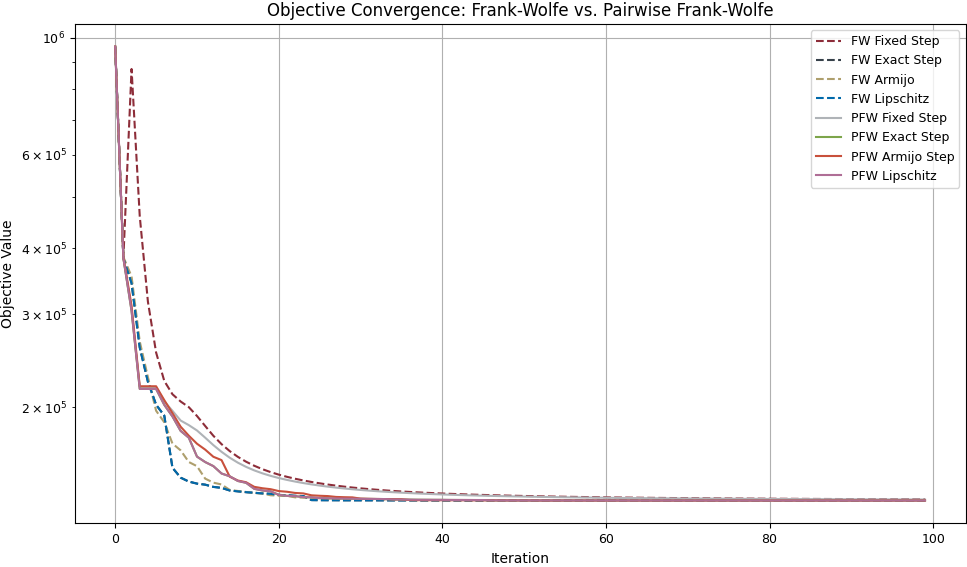

/var/folders/6b/bj1ncwb9433ghncl62bz8sm00000gn/T/ipykernel_74991/3797934262.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


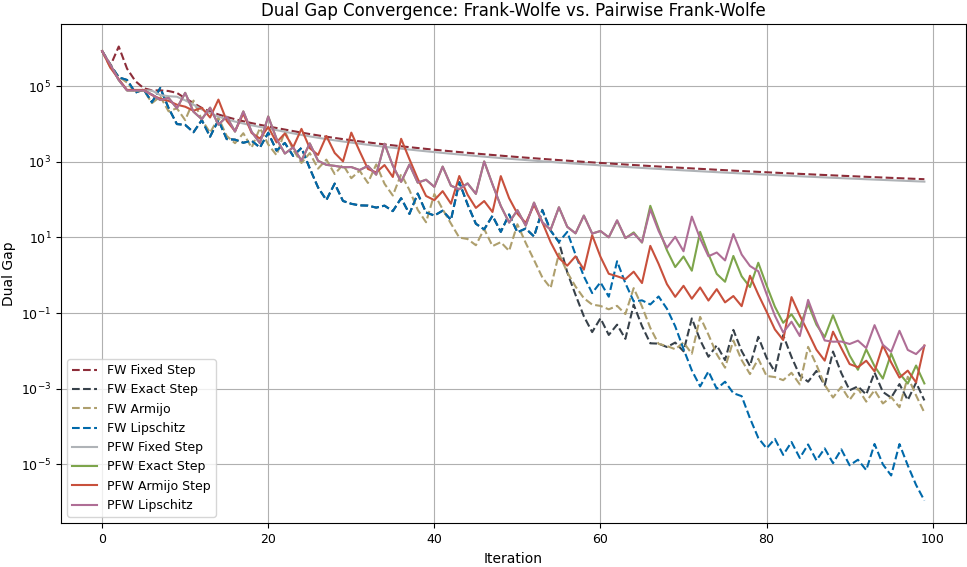

In [27]:
import matplotlib.pyplot as plt

# ==========================================================
# Plot 1: Objective Value Convergence
# ==========================================================
plt.figure(figsize=(10, 6))

# --- Frank-Wolfe (dashed lines) ---
plt.semilogy(objs_fw_fixedM,      '--', label='FW Fixed Step')
plt.semilogy(objs_fw_exactM,      '--', label='FW Exact Step')
plt.semilogy(objs_fw_armijoM,     '--', label='FW Armijo')
plt.semilogy(objs_fw_lipschitzM,  '--', label='FW Lipschitz')

# --- Pairwise Frank-Wolfe (solid lines) ---
plt.semilogy(objs_pfw_fixedM,     label='PFW Fixed Step')
plt.semilogy(objs_pfw_exactM,     label='PFW Exact Step')
plt.semilogy(objs_pfw_armijoM,    label='PFW Armijo Step')
plt.semilogy(objs_pfw_lipschitzM, label='PFW Lipschitz')

# --- Plot Formatting ---
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Objective Convergence: Frank-Wolfe vs. Pairwise Frank-Wolfe")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================================================
# Plot 2: Dual Gap Convergence
# ==========================================================
plt.figure(figsize=(10, 6))

# --- Frank-Wolfe (dashed lines) ---
plt.semilogy(gaps_fixedM,      '--', label='FW Fixed Step')
plt.semilogy(gaps_exactM,      '--', label='FW Exact Step')
plt.semilogy(gaps_armijoM,     '--', label='FW Armijo')
plt.semilogy(gaps_lipschitzM,  '--', label='FW Lipschitz')

# --- Pairwise Frank-Wolfe (solid lines) ---
plt.semilogy(gaps_pfw_fixedM,     label='PFW Fixed Step')
plt.semilogy(gaps_pfw_exactM,     label='PFW Exact Step')
plt.semilogy(gaps_pfw_armijoM,    label='PFW Armijo Step')
plt.semilogy(gaps_pfw_lipschitzM, label='PFW Lipschitz')

# --- Plot Formatting ---
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Dual Gap")
plt.title("Dual Gap Convergence: Frank-Wolfe vs. Pairwise Frank-Wolfe")
plt.grid(True)
plt.tight_layout()
plt.show()


# **XWines Dataset**

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.linalg import svd

# === Load XWine Dataset ===
data_path = 'XWines_Slim_150K_ratings.csv'
df = pd.read_csv(data_path)

# Keep only relevant columns and rename them
df = df[['UserID', 'WineID', 'Rating']]
df.columns = ['user_id', 'item_id', 'rating']

# === Filter Active Users ===
user_counts = df['user_id'].value_counts()
active_users = user_counts[user_counts > 10].index
df_active = df[df['user_id'].isin(active_users)].copy()

# === Re-index Users and Items ===
user_mapping = {uid: idx for idx, uid in enumerate(df_active['user_id'].unique())}
item_mapping = {iid: idx for idx, iid in enumerate(df_active['item_id'].unique())}
df_active['user_idx'] = df_active['user_id'].map(user_mapping)
df_active['item_idx'] = df_active['item_id'].map(item_mapping)

n_users = len(user_mapping)
n_items = len(item_mapping)

# === Train-Validation Split ===
train_data, val_data = train_test_split(df_active, test_size=0.2, random_state=42)

# === Build Observation Masks ===
train_mask = np.zeros((n_users, n_items), dtype=bool)
train_mask[train_data['user_idx'], train_data['item_idx']] = True

val_mask = np.zeros((n_users, n_items), dtype=bool)
val_mask[val_data['user_idx'], val_data['item_idx']] = True

# === Create Observed Matrix ===
M_obs = np.zeros((n_users, n_items))
M_obs[train_data['user_idx'], train_data['item_idx']] = train_data['rating']

# === Print Summary ===
print(f"Users: {n_users}, Items: {n_items}")
print(f"Train samples: {len(train_data)}, Validation samples: {len(val_data)}")
print(f"Shape of M_obs: {M_obs.shape}")

# === Compute Rank of M_obs ===
U, s, Vt = svd(M_obs, full_matrices=False)
tol = 1e-10  # Can also use: s.max() * eps * max(M_obs.shape)
rank = np.sum(s > tol)
print(f"Rank of the observed rating matrix M_obs: {rank}")


/var/folders/6b/bj1ncwb9433ghncl62bz8sm00000gn/T/ipykernel_74991/169682300.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Users: 6993, Items: 998
Train samples: 95872, Validation samples: 23968
Shape of M_obs: (6993, 998)
Rank of the observed rating matrix M_obs: 990


## **FW algorithm for XWines**

In [31]:
# === Estimate tau from singular values of M_obs ===
U, s, Vt = svd(M_obs, full_matrices=False)
tol = 1e-14
estimated_tau = np.sum(s) * 0.18  # Scale nuclear norm to control regularization strength

# === Run Frank-Wolfe Variants on M_obs ===
X_fw_fixedX, objs_fw_fixedX, gaps_fixedX = mc_fw(
    M_obs, train_mask, tau=estimated_tau, Tmax=100, TOL=1e-8, step_size="default"
)

X_fw_exactX, objs_fw_exactX, gaps_exactX = mc_fw(
    M_obs, train_mask, tau=estimated_tau, Tmax=100, TOL=1e-8,
    step_size="exact"
)

X_fw_armijoX, objs_fw_armijoX, gaps_armijoX = mc_fw(
    M_obs, train_mask, tau=estimated_tau, Tmax=100, TOL=1e-8, step_size="armijo"
)

X_fw_lipschitzX, objs_fw_lipschitzX, gaps_lipschitzX = mc_fw(
    M_obs, train_mask, tau=estimated_tau, Tmax=100, TOL=1e-8, step_size="lipschitz"
)

Iter  10, Obj = 1456829.85371, Gap = 2.06260e+06, Atoms = 9
Iter  20, Obj = 925485.29559, Gap = 7.69608e+05, Atoms = 19
Iter  30, Obj = 353440.50977, Gap = 1.51451e+05, Atoms = 29
Iter  40, Obj = 239401.33152, Gap = 6.44704e+04, Atoms = 39
Iter  50, Obj = 196398.69432, Gap = 3.61324e+04, Atoms = 49
Iter  60, Obj = 175304.40310, Gap = 2.33031e+04, Atoms = 59
Iter  70, Obj = 163307.06419, Gap = 1.63629e+04, Atoms = 69
Iter  80, Obj = 155799.25274, Gap = 1.21626e+04, Atoms = 79
Iter  90, Obj = 150775.01226, Gap = 9.41661e+03, Atoms = 89
Iter 100, Obj = 147241.13961, Gap = 7.51749e+03, Atoms = 99

Final number of atoms: 100
Final rank of X: 32
Iter  10, Obj = 239900.00843, Gap = 8.24145e+04, Atoms = 9
Iter  20, Obj = 166494.01835, Gap = 2.48091e+04, Atoms = 19
Iter  30, Obj = 146113.16379, Gap = 1.27289e+04, Atoms = 29
Iter  40, Obj = 138353.44378, Gap = 3.81330e+03, Atoms = 39
Iter  50, Obj = 134883.14751, Gap = 1.72557e+03, Atoms = 49
Iter  60, Obj = 133299.04443, Gap = 3.08618e+03, Atom

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# === Compute RMSE for Frank-Wolfe variants ===
rmse_fixed_FW_X      = evaluate_rmse(X_fw_fixedX, val_mask, M_obs)
rmse_exact_FW_X      = evaluate_rmse(X_fw_exactX, val_mask, M_obs)
rmse_armijo_FW_X     = evaluate_rmse(X_fw_armijoX, val_mask, M_obs)
rmse_lipschitz_FW_X  = evaluate_rmse(X_fw_lipschitzX, val_mask, M_obs)

# === Compute Relative Accuracy for each variant ===
relacc_fixed_FW_X     = relative_accuracy(X_fw_fixedX, M_obs, val_mask, tolerance=0.5)
relacc_exact_FW_X     = relative_accuracy(X_fw_exactX, M_obs, val_mask, tolerance=0.5)
relacc_armijo_FW_X    = relative_accuracy(X_fw_armijoX, M_obs, val_mask, tolerance=0.5)
relacc_lipschitz_FW_X = relative_accuracy(X_fw_lipschitzX, M_obs, val_mask, tolerance=0.5)

# === Print Evaluation Results ===
print("=== Evaluation Metrics (Frank-Wolfe) ===")
print(f"FW Fixed     → RMSE: {rmse_fixed_FW_X:.4f}, \t Relative Accuracy: {relacc_fixed_FW_X:.2f}%")
print(f"FW Exact     → RMSE: {rmse_exact_FW_X:.4f}, \t Relative Accuracy: {relacc_exact_FW_X:.2f}%")
print(f"FW Armijo    → RMSE: {rmse_armijo_FW_X:.4f}, \t Relative Accuracy: {relacc_armijo_FW_X:.2f}%")
print(f"FW Lipschitz → RMSE: {rmse_lipschitz_FW_X:.4f}, \t Relative Accuracy: {relacc_lipschitz_FW_X:.2f}%")


=== Evaluation Metrics (Frank-Wolfe) ===
FW Fixed     → RMSE: 2.9934, 	 Relative Accuracy: 99.66%
FW Exact     → RMSE: 3.0429, 	 Relative Accuracy: 99.66%
FW Armijo    → RMSE: 3.0429, 	 Relative Accuracy: 99.66%
FW Lipschitz → RMSE: 3.0430, 	 Relative Accuracy: 99.66%


## **Pairwise FW algorithm for XWines**

In [34]:
# === Estimate tau based on nuclear norm of M_obs ===
U, s, Vt = svd(M_obs, full_matrices=False)
tol = 1e-14
estimated_tau = np.sum(s) * 0.16  # Tuned scaling factor (e.g., 0.15, 0.16, 0.17 tried)

# === Run Pairwise Frank-Wolfe variants ===
X_pfw_fixedX,     objs_pfw_fixedX,     gaps_pfw_fixedX     = mc_pfw(M_obs, train_mask, tau=estimated_tau, Tmax=100, step_size='default')
X_pfw_exactX,     objs_pfw_exactX,     gaps_pfw_exactX     = mc_pfw(M_obs, train_mask, tau=estimated_tau, Tmax=100, step_size='exact')
X_pfw_armijoX,    objs_pfw_armijoX,    gaps_pfw_armijoX    = mc_pfw(M_obs, train_mask, tau=estimated_tau, Tmax=100, step_size='armijo')
X_pfw_lipschitzX, objs_pfw_lipschitzX, gaps_pfw_lipschitzX = mc_pfw(M_obs, train_mask, tau=estimated_tau, Tmax=100, step_size='lipschitz')


Iter  10, Obj=298063.94140, Gap=8.09e+04, Atoms=9
Iter  20, Obj=218902.99668, Gap=2.27e+04, Atoms=19
Iter  30, Obj=197993.38281, Gap=8.78e+03, Atoms=29
Iter  40, Obj=190567.43443, Gap=4.77e+03, Atoms=39
Iter  50, Obj=187190.28161, Gap=3.02e+03, Atoms=49
Iter  60, Obj=185369.95612, Gap=2.08e+03, Atoms=59
Iter  70, Obj=184276.38958, Gap=1.52e+03, Atoms=69
Iter  80, Obj=183567.92762, Gap=1.16e+03, Atoms=79
Iter  90, Obj=183082.65661, Gap=9.18e+02, Atoms=89
Iter 100, Obj=182735.69607, Gap=7.43e+02, Atoms=99

Final atoms: 100
Final rank of X: 27
Iter  10, Obj=313902.29710, Gap=1.14e+05, Atoms=9
Iter  20, Obj=209395.08720, Gap=1.88e+04, Atoms=19
Iter  30, Obj=187336.81635, Gap=5.20e+04, Atoms=29
Iter  40, Obj=183789.37771, Gap=1.32e+03, Atoms=39
Iter  50, Obj=181361.09422, Gap=6.08e+01, Atoms=49
Iter  60, Obj=181287.78725, Gap=2.26e+01, Atoms=59
Iter  70, Obj=181270.85405, Gap=1.62e+01, Atoms=69
Iter  80, Obj=181255.44948, Gap=1.50e-02, Atoms=79
Iter  90, Obj=181255.43487, Gap=9.39e-04, Atom

In [35]:
# === Compute RMSE for Pairwise Frank-Wolfe variants ===
rmse_fixed_PFW_X      = evaluate_rmse(X_pfw_fixedX, val_mask, M_obs)
rmse_exact_PFW_X      = evaluate_rmse(X_pfw_exactX, val_mask, M_obs)
rmse_armijo_PFW_X     = evaluate_rmse(X_pfw_armijoX, val_mask, M_obs)
rmse_lipschitz_PFW_X  = evaluate_rmse(X_pfw_lipschitzX, val_mask, M_obs)

# === Compute Relative Accuracy for each variant ===
relacc_fixed_PFW_X     = relative_accuracy(X_pfw_fixedX, M_obs, val_mask, tolerance=0.5)
relacc_exact_PFW_X     = relative_accuracy(X_pfw_exactX, M_obs, val_mask, tolerance=0.5)
relacc_armijo_PFW_X    = relative_accuracy(X_pfw_armijoX, M_obs, val_mask, tolerance=0.5)
relacc_lipschitz_PFW_X = relative_accuracy(X_pfw_lipschitzX, M_obs, val_mask, tolerance=0.5)

# === Print Evaluation Results ===
print("=== Evaluation Metrics (Pairwise Frank-Wolfe) ===")
print(f"PFW Fixed     → RMSE: {rmse_fixed_PFW_X:.4f}, \t Relative Accuracy: {relacc_fixed_PFW_X:.2f}%")
print(f"PFW Exact     → RMSE: {rmse_exact_PFW_X:.4f}, \t Relative Accuracy: {relacc_exact_PFW_X:.2f}%")
print(f"PFW Armijo    → RMSE: {rmse_armijo_PFW_X:.4f}, \t Relative Accuracy: {relacc_armijo_PFW_X:.2f}%")
print(f"PFW Lipschitz → RMSE: {rmse_lipschitz_PFW_X:.4f}, \t\t Relative Accuracy: {relacc_lipschitz_PFW_X:.2f}%")


=== Evaluation Metrics (Pairwise Frank-Wolfe) ===
PFW Fixed     → RMSE: 2.8361, 	 Relative Accuracy: 99.66%
PFW Exact     → RMSE: 2.8411, 	 Relative Accuracy: 99.66%
PFW Armijo    → RMSE: 2.8411, 	 Relative Accuracy: 99.66%
PFW Lipschitz → RMSE: 2.8411, 		 Relative Accuracy: 99.66%


## **Plots**

/var/folders/6b/bj1ncwb9433ghncl62bz8sm00000gn/T/ipykernel_74991/4263754688.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


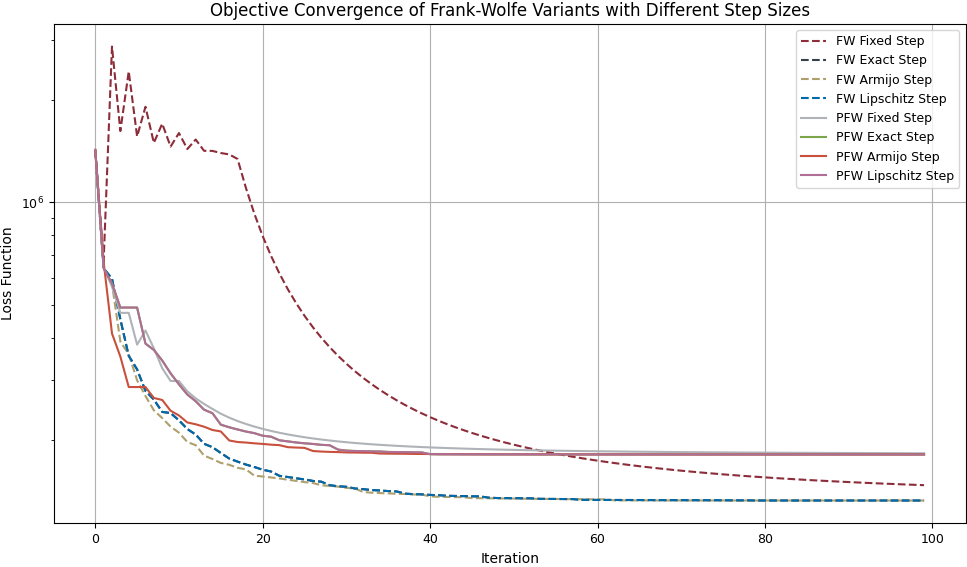

/var/folders/6b/bj1ncwb9433ghncl62bz8sm00000gn/T/ipykernel_74991/4263754688.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


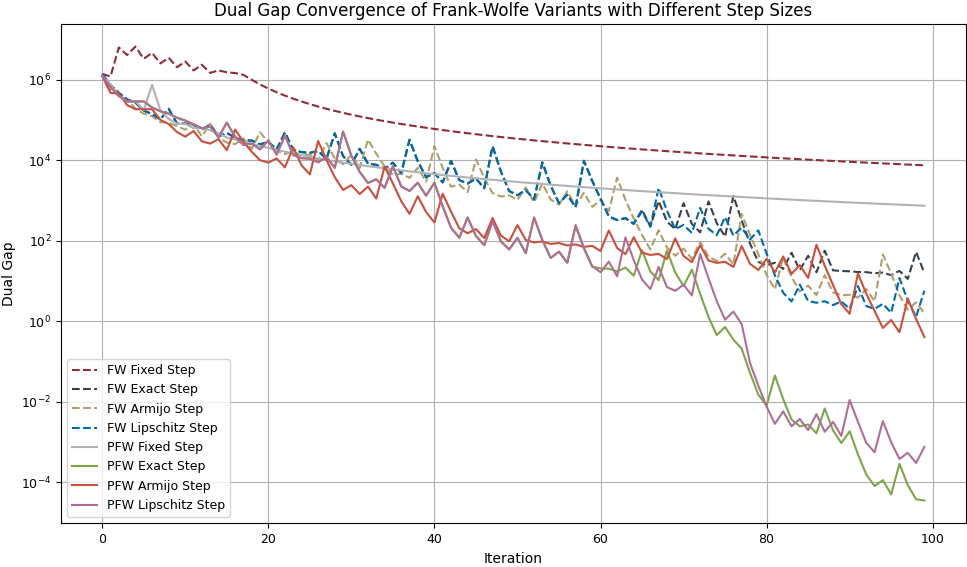

In [36]:
import matplotlib.pyplot as plt

# === Plot Objective Values for FW & PFW Variants ===
plt.figure(figsize=(10, 6))

# Frank-Wolfe (dashed lines)
plt.semilogy(objs_fw_fixedX,      '--', label='FW Fixed Step')
plt.semilogy(objs_fw_exactX,      '--', label='FW Exact Step')
plt.semilogy(objs_fw_armijoX,     '--', label='FW Armijo Step')
plt.semilogy(objs_fw_lipschitzX,  '--', label='FW Lipschitz Step')

# Pairwise Frank-Wolfe (solid lines)
plt.semilogy(objs_pfw_fixedX,     '-', label='PFW Fixed Step')
plt.semilogy(objs_pfw_exactX,     '-', label='PFW Exact Step')
plt.semilogy(objs_pfw_armijoX,    '-', label='PFW Armijo Step')
plt.semilogy(objs_pfw_lipschitzX, '-', label='PFW Lipschitz Step')

# Final touches
plt.title("Objective Convergence of Frank-Wolfe Variants with Different Step Sizes")
plt.xlabel("Iteration")
plt.ylabel("Loss Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Dual Gaps for FW & PFW Variants ===
plt.figure(figsize=(10, 6))

# Frank-Wolfe (dashed lines)
plt.semilogy(gaps_fixedX,      '--', label='FW Fixed Step')
plt.semilogy(gaps_exactX,      '--', label='FW Exact Step')
plt.semilogy(gaps_armijoX,     '--', label='FW Armijo Step')
plt.semilogy(gaps_lipschitzX,  '--', label='FW Lipschitz Step')

# Pairwise Frank-Wolfe (solid lines)
plt.semilogy(gaps_pfw_fixedX,     '-', label='PFW Fixed Step')
plt.semilogy(gaps_pfw_exactX,     '-', label='PFW Exact Step')
plt.semilogy(gaps_pfw_armijoX,    '-', label='PFW Armijo Step')
plt.semilogy(gaps_pfw_lipschitzX, '-', label='PFW Lipschitz Step')

# Final touches
plt.title("Dual Gap Convergence of Frank-Wolfe Variants with Different Step Sizes")
plt.xlabel("Iteration")
plt.ylabel("Dual Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
